In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy import stats 

abalone = pd.read_csv("C:\AI_HW/abalone.data")

abalone

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [33]:
abalone.isna().sum()

M         0
0.455     0
0.365     0
0.095     0
0.514     0
0.2245    0
0.101     0
0.15      0
15        0
dtype: int64

In [43]:
X=abalone.drop(['0.15', 'M'],axis=1)
X.head()

,0.455,0.365,0.095,0.514,0.2245,0.101,15
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,7
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,9
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,7
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,8


In [44]:
Y = pd.get_dummies(abalone['0.15']).values
Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [46]:
import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (7,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                512       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [48]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
98/98 [==============================] - 2s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 2/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 3/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 4/100
98/98 [==============================] - 0s 4ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 5/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 6/100
98/98 [==============================] - 0s 4ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 9.8322e-04 - val_mse: 9.8322e-04
Epoch 8/100
98/98 [==============================] - 0s 3ms/step - loss: 0.

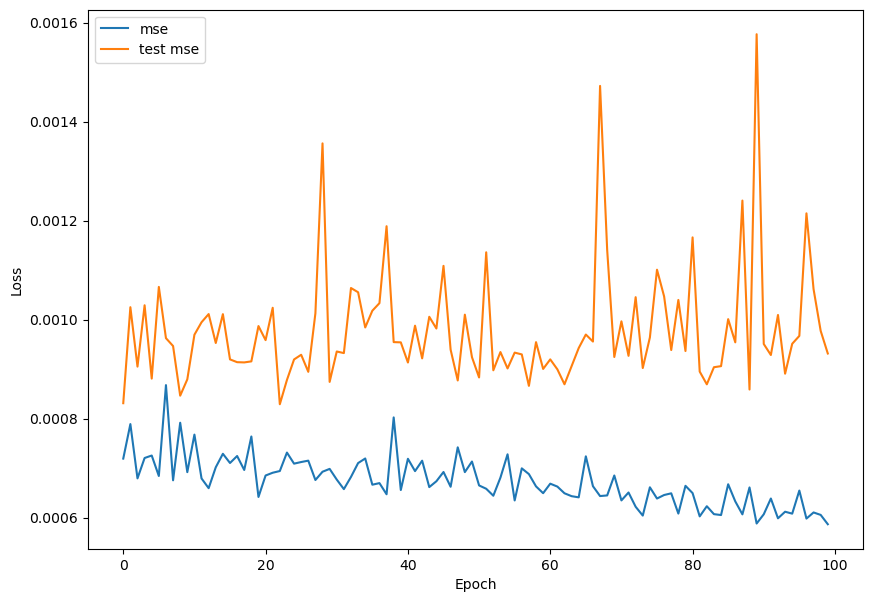

In [52]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
model.evaluate(X_test, y_test)

33/33 [==============================] - 0s 2ms/step - loss: 9.3140e-04 - mse: 9.3140e-04


[0.0009313985938206315, 0.0009313985938206315]